# Make heatmaps by clusters

In [8]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from dataset_handler import read_genexp_files, df_to_anndata, anndata_to_df

In [2]:
annot_df = pd.read_csv('neuron_annotations.csv', index_col=0)
genes = ["amon","brp","cac","Cadps","Fife","Liprin-alpha","Pdf","Rab27","Rab3",
         "Rbp","RhoGAP100F","Rim","Snap25","Syb","Syt1","Syt12","Syt14","Syt4",
         "Syt7","Sytalpha","Sytbeta","Syx13","Syx16","Syx17","Syx18","Syx4",
         "Syx5","Syx6","Syx7","Syx8","unc-13"]
data_df = read_genexp_files(genes)
df = data_df.join(annot_df, how='right')
df

Going through files...


In [19]:
adata = df_to_anndata(df)
# sc.pp.log1p(adata)
sc.pp.normalize_total(adata, target_sum=1e4,
                      exclude_highly_expressed=True,
                      inplace=False)
norm_df = anndata_to_df(adata)
norm_df

C:\Users\gonza\miniconda3\envs\psivenv\Lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


,amon,brp,cac,Cadps,Fife,Liprin-alpha,Pdf,Rab27,Rab3,Rbp,...,Syx6,Syx7,Syx8,unc-13,experiment,Repeats,condition,date,time,Idents
20181215_CLK856_LD_ZT14_AR07_ACAGGA,14,16,42,11,11,20,81,0,27,17,...,6,8,0,42,CLK856_LD,LD_2,LD,2018-12-15,ZT14,29:LPN
20181215_CLK856_LD_ZT14_AR07_CTTCTG,3,8,17,2,5,9,18,1,9,10,...,5,1,0,37,CLK856_LD,LD_2,LD,2018-12-15,ZT14,29:LPN
20181231_CLK856_LD_ZT14_AR02_GTACCA,5,4,15,5,2,0,81,0,13,8,...,4,2,0,34,CLK856_LD,LD_1,LD,2018-12-31,ZT14,29:LPN
20181231_CLK856_LD_ZT14_AR02_TCCTTC,3,12,14,9,6,2,81,0,3,16,...,1,2,0,69,CLK856_LD,LD_1,LD,2018-12-31,ZT14,29:LPN
20181231_CLK856_LD_ZT14_AR08_AGACAG,6,7,33,8,6,3,166,1,10,12,...,1,14,0,60,CLK856_LD,LD_1,LD,2018-12-31,ZT14,29:LPN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190710_CLK856_DD_CT06_AR04_GTCTTC,1,5,21,0,4,3,6,0,2,1,...,0,0,0,10,CLK856_DD,DD_1,DD,2019-07-10,CT06,1:DN1p_CNMa
20190710_CLK856_DD_CT06_AR04_TCCTTC,9,5,8,1,8,13,8,0,11,8,...,4,2,0,20,CLK856_DD,DD_1,DD,2019-07-10,CT06,1:DN1p_CNMa
20190719_CLK856_DD_CT06_AR18_GTCTTC,35,29,35,23,59,19,0,0,31,36,...,0,3,2,117,CLK856_DD,DD_2,DD,2019-07-19,CT06,1:DN1p_CNMa
20190814_CLK856_DD_CT06_AR19_TCTGCA,2,0,4,1,1,3,5,0,2,3,...,0,2,0,7,CLK856_DD,DD_2,DD,2019-08-14,CT06,1:DN1p_CNMa


In [20]:
LNV_df = norm_df[(norm_df['Idents'] == '2:s_LNv') & (norm_df['time'] == 'ZT14')]
LNV_df = LNV_df.select_dtypes(include=('float', 'int'))
LNV_df = LNV_df - LNV_df.mean(axis=0)
LNV_df

,amon,brp,cac,Cadps,Fife,Liprin-alpha,Pdf,Rab27,Rab3,Rbp,...,Syx13,Syx16,Syx17,Syx18,Syx4,Syx5,Syx6,Syx7,Syx8,unc-13
20181215_CLK856_LD_ZT14_AR07_AGACCA,0.9,-6.475,-0.9,-4.35,-5.725,-1.825,-488.775,-0.125,0.5,-2.9,...,-0.275,-0.425,-0.225,-0.175,10.425,-0.5,4.75,-0.45,0.45,-11.475
20181215_CLK856_LD_ZT14_AR07_CAACAG,2.9,3.525,2.1,-0.35,-0.725,-2.825,-159.775,-0.125,5.5,0.1,...,-0.275,0.575,-0.225,-0.175,1.425,0.5,9.75,-0.45,-0.55,-13.475
20181215_CLK856_LD_ZT14_AR07_CAACCA,3.9,-1.475,-2.9,-3.35,21.275,-0.825,-265.775,-0.125,-1.5,-0.9,...,-0.275,0.575,-0.225,-0.175,7.425,0.5,1.75,-2.45,1.45,-13.475
20181215_CLK856_LD_ZT14_AR07_GATCTG,-0.1,-0.475,2.1,-2.35,0.275,-1.825,-503.775,-0.125,-2.5,-3.9,...,-0.275,-0.425,0.775,-0.175,4.425,-0.5,-2.25,0.55,-0.55,-11.475
20181215_CLK856_LD_ZT14_AR08_ACCAAC,0.9,9.525,16.1,1.65,40.275,1.175,-173.775,1.875,4.5,-1.9,...,-0.275,-0.425,-0.225,1.825,6.425,-0.5,-1.25,-0.45,-0.55,12.525
20181215_CLK856_LD_ZT14_AR08_CAACTC,-1.1,-4.475,-9.9,-4.35,-10.725,-0.825,-247.775,-0.125,4.5,-6.9,...,0.725,-0.425,-0.225,-0.175,0.425,0.5,1.75,-2.45,-0.55,-11.475
20181215_CLK856_LD_ZT14_AR08_CTCATG,-3.1,0.525,2.1,-0.35,4.275,0.175,-289.775,-0.125,4.5,3.1,...,0.725,0.575,-0.225,-0.175,3.425,-0.5,4.75,2.55,-0.55,-3.475
20181231_CLK856_LD_ZT14_AR07_ACGTTG,-2.1,-2.475,-2.9,0.65,-1.725,-1.825,22.225,-0.125,2.5,-2.9,...,-0.275,-0.425,-0.225,-0.175,-2.575,-0.5,-1.25,-1.45,-0.55,-15.475
20181231_CLK856_LD_ZT14_AR07_ACTCAC,-1.1,-3.475,-1.9,-4.35,10.275,0.175,443.225,-0.125,-2.5,-2.9,...,-0.275,0.575,0.775,0.825,-2.575,-0.5,-0.25,-2.45,-0.55,-7.475
20181231_CLK856_LD_ZT14_AR07_ACTCGA,-3.1,-7.475,-9.9,-1.35,9.275,-0.825,-263.775,-0.125,1.5,-2.9,...,-0.275,1.575,-0.225,-0.175,-2.575,-0.5,-2.25,-0.45,0.45,-20.475


<Axes: >

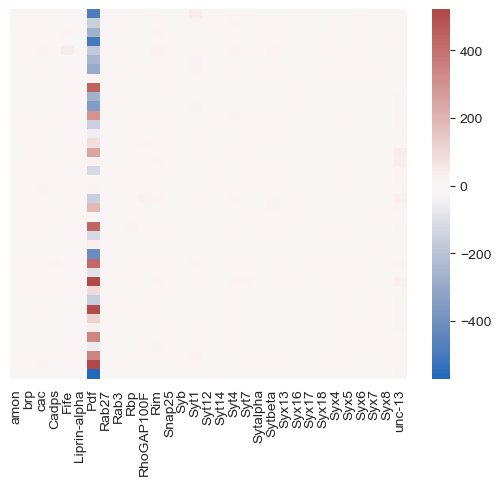

In [21]:
sns.heatmap(LNV_df,
            cmap='vlag', 
            cbar=True, 
            center=0, 
            yticklabels=False, 
            xticklabels=True)